<a href="https://colab.research.google.com/github/Najila-1234/laptop_price_prediction/blob/main/laptop_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#import dataset
df=pd.read_csv('/content/laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [ ]:
df.shape # find no of rows and colms

(1303, 12)

In [ ]:
df.columns # print colum names

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
df.dtypes # print dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [ ]:
df.isna().sum() # find the missing values

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
# calculate the value counts
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [ ]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [ ]:
df['ScreenResolution'].value_counts()

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [ ]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [ ]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [ ]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [ ]:
# # create a copy of dataframe
# dfe=df.copy()
# #Label encoding before feature selection
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# for col in dfe.columns:
#   dfe[col]=le.fit_transform(dfe[col])
# dfe

In [ ]:
# cat_data=dfe[['Company', 'TypeName', 'Cpu', 'OpSys']]
# cont_data=dfe[['Unnamed: 0' ,	'Inches'	,'ScreenResolution' ,	'Memory' ,	'Gpu' ,	'Weight']]
# out=dfe['Price']

In [ ]:
# #Chi Square Test for feature selection in case of categorical input labels
# from sklearn.feature_selection import chi2
# score1=chi2(cat_data,out)
# score1

In [ ]:
# f_value1=pd.Series(score1[0],cat_data.columns)
# f_value1.sort_values(ascending=False)

In [ ]:
# p_value1=pd.Series(score1[1],index=cat_data.columns)
# p_value1.sort_values(ascending=False)

In [ ]:
# #Annova Test for feature selection in case of continuous input labels
# from sklearn.feature_selection import f_classif
# score2=f_classif(cont_data,out)
# score2

In [ ]:
# f_value2=pd.Series(score2[0],index=cont_data.columns)
# f_value2.sort_values(ascending=False)

In [ ]:
# p_value2=pd.Series(score2[1],index=cont_data.columns)
# p_value2.sort_values(ascending=False)

In [ ]:
df=df.drop(['Unnamed: 0',],axis=1)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [ ]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [ ]:
# replace strings gb and kg
df['Ram']=df['Ram'].str.replace('GB',"")
df['Weight']=df['Weight'].str.replace("kg","")

In [ ]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [ ]:
# convert dtype string to float
df['Ram']=df['Ram'].astype(float)
df['Weight']=df['Weight'].astype(float)

In [ ]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                 float64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

In [ ]:
pd.get_dummies(df['Company']) # do encoding using get_dummies to company

,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df=df.join(pd.get_dummies(df['Company'])) # join the encoded colms to original dataset
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,False,False,False,False,False,False,False,False,False,False
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,False,False,False,False,False,False,False,False,False,False
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,False,False,False,False,False,False,False,False,False,False
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,False,False,False,False,False,False,False,False,False,False
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,...,False,True,False,False,False,False,False,False,False,False
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,...,False,True,False,False,False,False,False,False,False,False
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,...,False,True,False,False,False,False,False,False,False,False
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df=df.drop(['Company'],axis=1) # drop company
df

,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,False,False,False,False,False,False,False,False,False,False
1,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,False,False,False,False,False,False,False,False,False,False
2,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,False,False,False,False,False,False,False,False,False,False
3,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,False,False,False,False,False,False,False,False,False,False
4,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,...,False,True,False,False,False,False,False,False,False,False
1299,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,...,False,True,False,False,False,False,False,False,False,False
1300,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,...,False,True,False,False,False,False,False,False,False,False
1301,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df=df.join(pd.get_dummies(df['TypeName']))
df

,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,False,False,False,False,False,False,False,False,True,False
1,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,False,False,False,False,False,False,False,False,True,False
2,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,False,False,False,False,False,False,False,True,False,False
3,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,False,False,False,False,False,False,False,False,True,False
4,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,...,False,False,False,False,True,False,False,False,False,False
1299,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,...,False,False,False,False,True,False,False,False,False,False
1300,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,...,False,False,False,False,False,False,False,True,False,False
1301,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df=df.drop(['TypeName'],axis=1)
df

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Acer,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,...,False,False,False,False,False,False,False,False,True,False
1,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,...,False,False,False,False,False,False,False,False,True,False
2,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,...,False,False,False,False,False,False,False,True,False,False
3,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,...,False,False,False,False,False,False,False,False,True,False
4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,False,...,False,False,False,False,True,False,False,False,False,False
1299,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,False,...,False,False,False,False,True,False,False,False,False,False
1300,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,False,...,False,False,False,False,False,False,False,True,False,False
1301,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# split screen resolution values and take last frequency value only
df['ScreenResolution']=df['ScreenResolution'].str.split(" ").apply(lambda x:x[-1])
df['ScreenWidth']=df['ScreenResolution'].str.split("x").apply(lambda x:x[0])
df['ScreenHeight']=df['ScreenResolution'].str.split("x").apply(lambda x:x[1])
df['ScreenWidth']=df['ScreenWidth'].astype(int)
df['ScreenHeight']=df['ScreenHeight'].astype(int)


NameError: name 'df' is not defined

In [ ]:
df=df.drop(['ScreenResolution'],axis=1)
df

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Acer,Apple,...,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight
0,13.3,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,...,False,False,False,False,False,False,True,False,2560,1600
1,13.3,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,True,...,False,False,False,False,False,False,True,False,1440,900
2,15.6,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,...,False,False,False,False,False,True,False,False,1920,1080
3,15.4,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,...,False,False,False,False,False,False,True,False,2880,1800
4,13.3,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,...,False,False,False,False,False,False,True,False,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,False,False,...,False,False,True,False,False,False,False,False,1920,1080
1299,13.3,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,False,False,...,False,False,True,False,False,False,False,False,3200,1800
1300,14.0,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,False,False,...,False,False,False,False,False,True,False,False,1366,768
1301,15.6,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,False,False,...,False,False,False,False,False,True,False,False,1366,768


In [ ]:
df['CpuBrand']=df['Cpu'].str.split(" ").apply(lambda x:x[0])
df['CpuFrequency']=df['Cpu'].str.split(" ").apply(lambda x:x[-1])
# remove ghz in frequency
df['CpuFrequency']=df['CpuFrequency'].str.replace("GHz","")
df['CpuFrequency']=df['CpuFrequency'].astype(float)


In [ ]:
df=df.drop(['Cpu'],axis=1)
df

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Acer,Apple,Asus,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CpuBrand,CpuFrequency
0,13.3,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,False,...,False,False,False,False,True,False,2560,1600,Intel,2.3
1,13.3,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,True,False,...,False,False,False,False,True,False,1440,900,Intel,1.8
2,15.6,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,False,...,False,False,False,True,False,False,1920,1080,Intel,2.5
3,15.4,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,False,...,False,False,False,False,True,False,2880,1800,Intel,2.7
4,13.3,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,False,...,False,False,False,False,True,False,2560,1600,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,False,False,False,...,True,False,False,False,False,False,1920,1080,Intel,2.5
1299,13.3,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,False,False,False,...,True,False,False,False,False,False,3200,1800,Intel,2.5
1300,14.0,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,False,False,False,...,False,False,False,True,False,False,1366,768,Intel,1.6
1301,15.6,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,False,False,False,...,False,False,False,True,False,False,1366,768,Intel,2.5


In [ ]:
df.dtypes

Inches                float64
Ram                   float64
Memory                 object
Gpu                    object
OpSys                  object
Weight                float64
Price                 float64
Acer                     bool
Apple                    bool
Asus                     bool
Chuwi                    bool
Dell                     bool
Fujitsu                  bool
Google                   bool
HP                       bool
Huawei                   bool
LG                       bool
Lenovo                   bool
MSI                      bool
Mediacom                 bool
Microsoft                bool
Razer                    bool
Samsung                  bool
Toshiba                  bool
Vero                     bool
Xiaomi                   bool
2 in 1 Convertible       bool
Gaming                   bool
Netbook                  bool
Notebook                 bool
Ultrabook                bool
Workstation              bool
ScreenWidth             int64
ScreenHeig

In [ ]:
# take memory as list and split into memory amount and memory type
df['MemoryAmount']=df['Memory'].str.split(" ").apply(lambda x: x[0])
df['MemoryType']=df['Memory'].str.split(" ").apply(lambda x: x[1])

In [ ]:
# convert gb and tb to mb small size ,to make all units same
def turn_memory_into_MB(value):
  if "GB" in value:
    return float(value[:value.find("GB")])*1000
  elif "TB" in value:
    return float(value[:value.find("TB")])*1000000


In [ ]:
df['MemoryAmount']=df['MemoryAmount'].apply(turn_memory_into_MB)

In [ ]:
df= df.drop("Memory",axis=1)

In [ ]:
df

,Inches,Ram,Gpu,OpSys,Weight,Price,Acer,Apple,Asus,Chuwi,...,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CpuBrand,CpuFrequency,MemoryAmount,MemoryType
0,13.3,8.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,False,False,...,False,False,True,False,2560,1600,Intel,2.3,128000.0,SSD
1,13.3,8.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,True,False,False,...,False,False,True,False,1440,900,Intel,1.8,128000.0,Flash
2,15.6,8.0,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,False,False,...,False,True,False,False,1920,1080,Intel,2.5,256000.0,SSD
3,15.4,16.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,False,False,...,False,False,True,False,2880,1800,Intel,2.7,512000.0,SSD
4,13.3,8.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,False,False,...,False,False,True,False,2560,1600,Intel,3.1,256000.0,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4.0,Intel HD Graphics 520,Windows 10,1.80,33992.6400,False,False,False,False,...,False,False,False,False,1920,1080,Intel,2.5,128000.0,SSD
1299,13.3,16.0,Intel HD Graphics 520,Windows 10,1.30,79866.7200,False,False,False,False,...,False,False,False,False,3200,1800,Intel,2.5,512000.0,SSD
1300,14.0,2.0,Intel HD Graphics,Windows 10,1.50,12201.1200,False,False,False,False,...,False,True,False,False,1366,768,Intel,1.6,64000.0,Flash
1301,15.6,6.0,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,False,False,False,False,...,False,True,False,False,1366,768,Intel,2.5,1000000.0,HDD


In [ ]:
df.dtypes

Inches                float64
Ram                   float64
Gpu                    object
OpSys                  object
Weight                float64
Price                 float64
Acer                     bool
Apple                    bool
Asus                     bool
Chuwi                    bool
Dell                     bool
Fujitsu                  bool
Google                   bool
HP                       bool
Huawei                   bool
LG                       bool
Lenovo                   bool
MSI                      bool
Mediacom                 bool
Microsoft                bool
Razer                    bool
Samsung                  bool
Toshiba                  bool
Vero                     bool
Xiaomi                   bool
2 in 1 Convertible       bool
Gaming                   bool
Netbook                  bool
Notebook                 bool
Ultrabook                bool
Workstation              bool
ScreenWidth             int64
ScreenHeight            int64
CpuBrand  

In [ ]:
# gpu
df['GpuBrand']=df['Gpu'].str.split(" ").apply(lambda x:x[0])

In [ ]:
df['GpuBrand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: GpuBrand, Length: 1303, dtype: object

In [ ]:
df=df.drop("Gpu",axis=1)
df

,Inches,Ram,OpSys,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,...,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CpuBrand,CpuFrequency,MemoryAmount,MemoryType,GpuBrand
0,13.3,8.0,macOS,1.37,71378.6832,False,True,False,False,False,...,False,True,False,2560,1600,Intel,2.3,128000.0,SSD,Intel
1,13.3,8.0,macOS,1.34,47895.5232,False,True,False,False,False,...,False,True,False,1440,900,Intel,1.8,128000.0,Flash,Intel
2,15.6,8.0,No OS,1.86,30636.0000,False,False,False,False,False,...,True,False,False,1920,1080,Intel,2.5,256000.0,SSD,Intel
3,15.4,16.0,macOS,1.83,135195.3360,False,True,False,False,False,...,False,True,False,2880,1800,Intel,2.7,512000.0,SSD,AMD
4,13.3,8.0,macOS,1.37,96095.8080,False,True,False,False,False,...,False,True,False,2560,1600,Intel,3.1,256000.0,SSD,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4.0,Windows 10,1.80,33992.6400,False,False,False,False,False,...,False,False,False,1920,1080,Intel,2.5,128000.0,SSD,Intel
1299,13.3,16.0,Windows 10,1.30,79866.7200,False,False,False,False,False,...,False,False,False,3200,1800,Intel,2.5,512000.0,SSD,Intel
1300,14.0,2.0,Windows 10,1.50,12201.1200,False,False,False,False,False,...,True,False,False,1366,768,Intel,1.6,64000.0,Flash,Intel
1301,15.6,6.0,Windows 10,2.19,40705.9200,False,False,False,False,False,...,True,False,False,1366,768,Intel,2.5,1000000.0,HDD,AMD


In [ ]:
#opsys , convert using get_dummies to 0 and 1
df=df.join(pd.get_dummies(df.OpSys))


In [ ]:
df

,Inches,Ram,OpSys,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,...,GpuBrand,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13.3,8.0,macOS,1.37,71378.6832,False,True,False,False,False,...,Intel,False,False,False,False,False,False,False,False,True
1,13.3,8.0,macOS,1.34,47895.5232,False,True,False,False,False,...,Intel,False,False,False,False,False,False,False,False,True
2,15.6,8.0,No OS,1.86,30636.0000,False,False,False,False,False,...,Intel,False,False,False,False,True,False,False,False,False
3,15.4,16.0,macOS,1.83,135195.3360,False,True,False,False,False,...,AMD,False,False,False,False,False,False,False,False,True
4,13.3,8.0,macOS,1.37,96095.8080,False,True,False,False,False,...,Intel,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4.0,Windows 10,1.80,33992.6400,False,False,False,False,False,...,Intel,False,False,False,False,False,True,False,False,False
1299,13.3,16.0,Windows 10,1.30,79866.7200,False,False,False,False,False,...,Intel,False,False,False,False,False,True,False,False,False
1300,14.0,2.0,Windows 10,1.50,12201.1200,False,False,False,False,False,...,Intel,False,False,False,False,False,True,False,False,False
1301,15.6,6.0,Windows 10,2.19,40705.9200,False,False,False,False,False,...,AMD,False,False,False,False,False,True,False,False,False


In [ ]:
df= df.drop("OpSys",axis=1)

In [ ]:
cpu_categories= pd.get_dummies(df["CpuBrand"])
cpu_categories.columns =[col+"_Cpu" for col in cpu_categories.columns]
df= df.join(cpu_categories)
df= df.drop("CpuBrand",axis=1)


In [ ]:
gpu_categories= pd.get_dummies(df["GpuBrand"])
gpu_categories.columns =[col+"_Gpu" for col in gpu_categories.columns]
df= df.join(gpu_categories)
df= df.drop("GpuBrand",axis=1)

In [ ]:
df.columns

Index(['Inches', 'Ram', 'Weight', 'Price', 'Acer', 'Apple', 'Asus', 'Chuwi',
       'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG', 'Lenovo', 'MSI',
       'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Vero',
       'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'ScreenWidth', 'ScreenHeight',
       'CpuFrequency', 'MemoryAmount', 'MemoryType', 'Android', 'Chrome OS',
       'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7',
       'macOS', 'AMD_Cpu', 'Intel_Cpu', 'Samsung_Cpu', 'AMD_Gpu', 'ARM_Gpu',
       'Intel_Gpu', 'Nvidia_Gpu'],
      dtype='object')

In [ ]:
df.dtypes

Inches                float64
Ram                   float64
Weight                float64
Price                 float64
Acer                     bool
Apple                    bool
Asus                     bool
Chuwi                    bool
Dell                     bool
Fujitsu                  bool
Google                   bool
HP                       bool
Huawei                   bool
LG                       bool
Lenovo                   bool
MSI                      bool
Mediacom                 bool
Microsoft                bool
Razer                    bool
Samsung                  bool
Toshiba                  bool
Vero                     bool
Xiaomi                   bool
2 in 1 Convertible       bool
Gaming                   bool
Netbook                  bool
Notebook                 bool
Ultrabook                bool
Workstation              bool
ScreenWidth             int64
ScreenHeight            int64
CpuFrequency          float64
MemoryAmount          float64
MemoryType

In [ ]:
df= df.join(pd.get_dummies(df['MemoryType']))
df=df.drop('MemoryType',axis=1)

In [ ]:
# convert all boolean to int
boolean= [col for col in df.columns if df[col].dtype == bool]

for i in boolean:
  df[i]=df[i].astype(int)

In [ ]:
df

,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Intel_Cpu,Samsung_Cpu,AMD_Gpu,ARM_Gpu,Intel_Gpu,Nvidia_Gpu,Flash,HDD,Hybrid,SSD
0,13.3,8.0,1.37,71378.6832,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,13.3,8.0,1.34,47895.5232,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,15.6,8.0,1.86,30636.0000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,15.4,16.0,1.83,135195.3360,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,13.3,8.0,1.37,96095.8080,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4.0,1.80,33992.6400,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1299,13.3,16.0,1.30,79866.7200,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1300,14.0,2.0,1.50,12201.1200,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
1301,15.6,6.0,2.19,40705.9200,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [ ]:
df.columns

Index(['Inches', 'Ram', 'Weight', 'Price', 'Acer', 'Apple', 'Asus', 'Chuwi',
       'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG', 'Lenovo', 'MSI',
       'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Vero',
       'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'ScreenWidth', 'ScreenHeight',
       'CpuFrequency', 'MemoryAmount', 'Android', 'Chrome OS', 'Linux',
       'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS',
       'AMD_Cpu', 'Intel_Cpu', 'Samsung_Cpu', 'AMD_Gpu', 'ARM_Gpu',
       'Intel_Gpu', 'Nvidia_Gpu', 'Flash', 'HDD', 'Hybrid', 'SSD'],
      dtype='object')

In [ ]:
df.dtypes

Inches                float64
Ram                   float64
Weight                float64
Price                 float64
Acer                    int64
Apple                   int64
Asus                    int64
Chuwi                   int64
Dell                    int64
Fujitsu                 int64
Google                  int64
HP                      int64
Huawei                  int64
LG                      int64
Lenovo                  int64
MSI                     int64
Mediacom                int64
Microsoft               int64
Razer                   int64
Samsung                 int64
Toshiba                 int64
Vero                    int64
Xiaomi                  int64
2 in 1 Convertible      int64
Gaming                  int64
Netbook                 int64
Notebook                int64
Ultrabook               int64
Workstation             int64
ScreenWidth             int64
ScreenHeight            int64
CpuFrequency          float64
MemoryAmount          float64
Android   

In [ ]:


df.corr()

,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Intel_Cpu,Samsung_Cpu,AMD_Gpu,ARM_Gpu,Intel_Gpu,Nvidia_Gpu,Flash,HDD,Hybrid,SSD
Inches,1.000000,0.237993,0.827631,0.068197,0.009435,-0.158850,0.112766,-0.017426,0.045288,0.019637,...,-0.122000,-0.052816,0.207023,-0.052816,-0.592264,0.486561,-0.367908,0.271145,0.026080,-0.082325
Ram,0.237993,1.000000,0.383874,0.743007,-0.138432,0.023950,0.088634,-0.035117,0.082241,-0.016214,...,0.107051,-0.023894,-0.093119,-0.023894,-0.319551,0.415464,-0.192327,-0.318614,-0.016994,0.398663
Weight,0.827631,0.383874,1.000000,0.210370,0.056444,-0.138191,0.101332,-0.022536,0.088465,0.014053,...,-0.057386,-0.037026,0.106519,-0.037026,-0.596378,0.565232,-0.259337,0.166644,0.030970,-0.037134
Price,0.068197,0.743007,0.210370,1.000000,-0.208349,0.080688,-0.010376,-0.055646,0.048509,-0.027135,...,0.181127,-0.018431,-0.199415,-0.018431,-0.184205,0.348797,-0.210823,-0.426121,-0.039386,0.513609
Acer,0.009435,-0.138432,0.056444,-0.208349,1.000000,-0.037497,-0.108831,-0.014074,-0.159187,-0.014074,...,-0.066566,-0.008119,-0.034859,-0.008119,0.005305,0.020848,0.086359,0.109048,-0.025765,-0.140685
Apple,-0.158850,0.023950,-0.138191,0.080688,-0.037497,1.000000,-0.047544,-0.006148,-0.069542,-0.006148,...,0.028849,-0.003547,0.001749,-0.003547,0.078028,-0.085183,0.230044,-0.081359,-0.011256,-0.032982
Asus,0.112766,0.088634,0.101332,-0.010376,-0.108831,-0.047544,1.000000,-0.017845,-0.201839,-0.017845,...,-0.036835,-0.010295,-0.073770,-0.010295,-0.106654,0.170742,0.049519,-0.007644,-0.032668,-0.010926
Chuwi,-0.017426,-0.035117,-0.022536,-0.055646,-0.014074,-0.006148,-0.017845,1.000000,-0.026102,-0.002308,...,0.010828,-0.001331,-0.019232,-0.001331,0.043093,-0.031972,0.194383,-0.030537,-0.004225,-0.065032
Dell,0.045288,0.082241,0.088465,0.048509,-0.159187,-0.069542,-0.201839,-0.026102,1.000000,-0.026102,...,0.122473,-0.015058,0.190722,-0.015058,-0.075707,-0.060187,-0.118570,0.046568,-0.005856,0.014739
Fujitsu,0.019637,-0.016214,0.014053,-0.027135,-0.014074,-0.006148,-0.017845,-0.002308,-0.026102,1.000000,...,0.010828,-0.001331,-0.019232,-0.001331,0.043093,-0.031972,-0.011872,0.004832,-0.004225,0.001980


<Axes: >

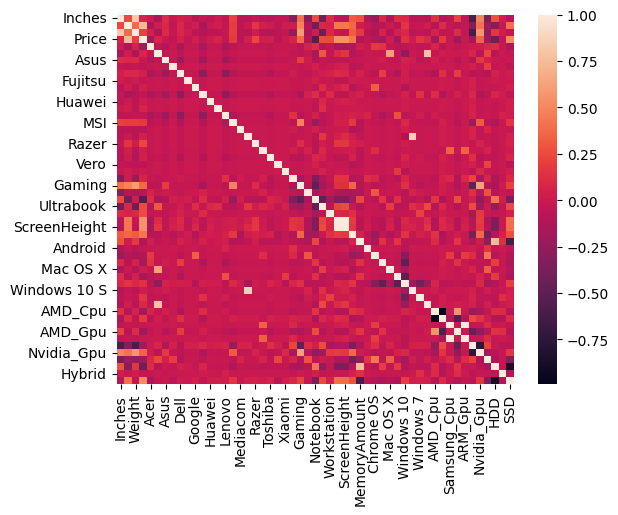

In [ ]:
# display the correlation using heatmap)
import seaborn as sns
sns.heatmap(df.corr())

In [ ]:
# take input values which is closer to output value sort in desc and take last 20 values closer to output price
correlation = df.corr()['Price'].apply(abs).sort_values().index
correlation=list(correlation[-20:])
print(correlation)

['AMD_Cpu', 'Intel_Cpu', 'Intel_Gpu', 'AMD_Gpu', 'Acer', 'Weight', 'Flash', 'Razer', 'Workstation', 'Ultrabook', 'Nvidia_Gpu', 'Gaming', 'HDD', 'CpuFrequency', 'SSD', 'Notebook', 'ScreenHeight', 'ScreenWidth', 'Ram', 'Price']


In [ ]:
df=df[correlation]
df

,AMD_Cpu,Intel_Cpu,Intel_Gpu,AMD_Gpu,Acer,Weight,Flash,Razer,Workstation,Ultrabook,Nvidia_Gpu,Gaming,HDD,CpuFrequency,SSD,Notebook,ScreenHeight,ScreenWidth,Ram,Price
0,0,1,1,0,0,1.37,0,0,0,1,0,0,0,2.3,1,0,1600,2560,8.0,71378.6832
1,0,1,1,0,0,1.34,1,0,0,1,0,0,0,1.8,0,0,900,1440,8.0,47895.5232
2,0,1,1,0,0,1.86,0,0,0,0,0,0,0,2.5,1,1,1080,1920,8.0,30636.0000
3,0,1,0,1,0,1.83,0,0,0,1,0,0,0,2.7,1,0,1800,2880,16.0,135195.3360
4,0,1,1,0,0,1.37,0,0,0,1,0,0,0,3.1,1,0,1600,2560,8.0,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,1,1,0,0,1.80,0,0,0,0,0,0,0,2.5,1,0,1080,1920,4.0,33992.6400
1299,0,1,1,0,0,1.30,0,0,0,0,0,0,0,2.5,1,0,1800,3200,16.0,79866.7200
1300,0,1,1,0,0,1.50,1,0,0,0,0,0,0,1.6,0,1,768,1366,2.0,12201.1200
1301,0,1,0,1,0,2.19,0,0,0,0,0,0,1,2.5,0,1,768,1366,6.0,40705.9200


<Axes: >

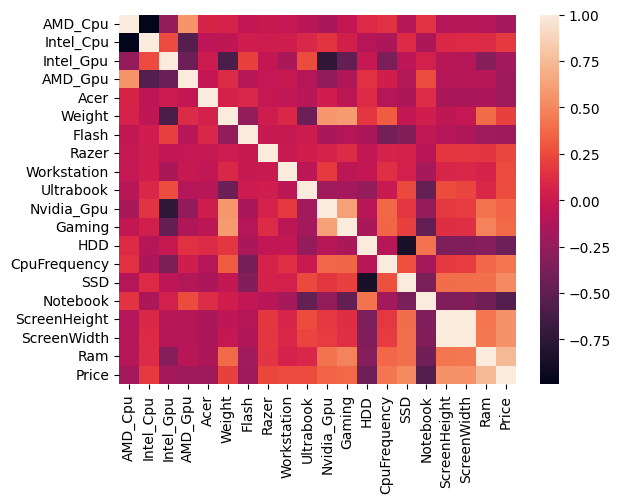

In [ ]:
sns.heatmap(df.corr())

In [ ]:
x=df.drop('Price',axis=1)
y=df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
y_pred

array([ 71411.184     ,  63274.2624    ,  30602.93976   ,  48346.05888   ,
        72600.303024  ,  86160.12696   ,  46913.7678048 ,  30186.426024  ,
        68960.0342256 ,  21065.75999077, 121217.747136  ,  47989.0141488 ,
       102841.57104   ,  39842.1947232 , 101898.7326    ,  56154.569664  ,
        71339.388312  ,  50530.045152  ,  34787.7235872 , 103456.44      ,
       142385.64554057,  38047.269312  ,  64734.011856  ,  32741.575872  ,
        51318.326304  ,  55406.841696  ,  52693.099488  ,  26738.55468   ,
        59557.4496    ,  57408.6024648 ,  27766.6056    ,  99223.827072  ,
        83680.26264   ,  63465.846624  ,  48847.4297184 ,  36774.520224  ,
        40662.44225143,  27911.708352  ,  58514.168592  ,  12777.432     ,
        68814.04152   ,  44551.769856  ,  50064.05583   , 140267.560032  ,
        33189.094128  ,  80861.2050528 , 108143.8611312 ,  12483.55728   ,
        51458.456256  ,  76718.749344  ,  92191.48512   ,  30567.998736  ,
        53129.610984  ,  

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
mean_absolute_percentage_error(y_test,y_pred)

0.19102652252010197

In [ ]:
r2_score(y_test,y_pred)

0.7913625776115398

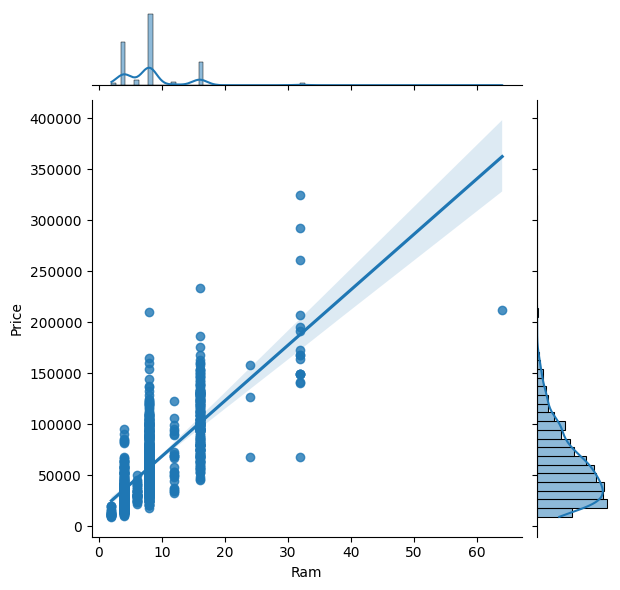

In [ ]:
# jointplot ,kind=hexbin,kde,reg
sns.jointplot(x="Ram",y="Price",data=df,kind="reg")

<Axes: xlabel='CpuFrequency', ylabel='count'>

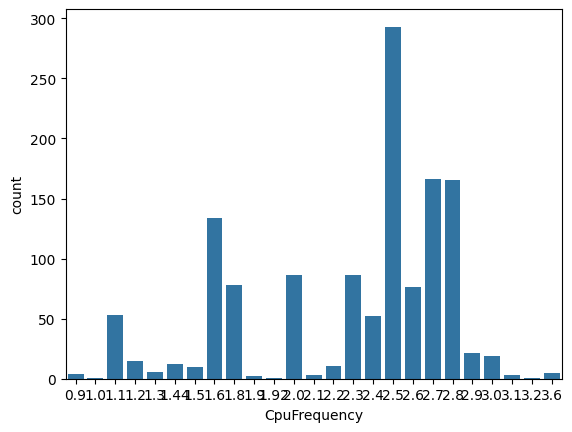

In [ ]:
# calculate the count of cpufrequency
sns.countplot(x='CpuFrequency',data=df)

<Axes: xlabel='Ram', ylabel='Price'>

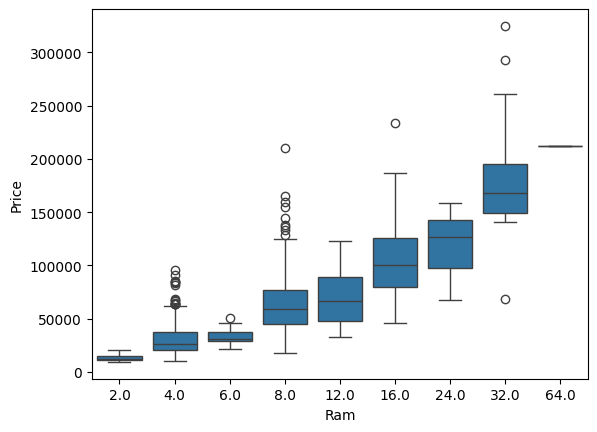

In [ ]:
sns.boxplot(x='Ram',y='Price',data=df)

In [ ]:
# predict using an external value
df.columns

Index(['AMD_Cpu', 'Intel_Cpu', 'Intel_Gpu', 'AMD_Gpu', 'Acer', 'Weight',
       'Flash', 'Razer', 'Workstation', 'Ultrabook', 'Nvidia_Gpu', 'Gaming',
       'HDD', 'CpuFrequency', 'SSD', 'Notebook', 'ScreenHeight', 'ScreenWidth',
       'Ram', 'Price'],
      dtype='object')

In [ ]:
input=np.array([[0,1,0,1,1,1.9,0,1,1,0,1,1,0,3.5,0,1,2000,1000,32]])

predicted_output=rfr.predict(input)
print(predicted_output)

[214902.679536]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# save the model
from joblib import dump,load
dump(rfr,"laptop.joblib")
# load the model
load=load("laptop.joblib")